In [63]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({
    'Group': ['A', 'B', 'C', 'D', 'E'],
    'Value': [1, 5, 4, 3, 9]
})

<BarContainer object of 5 artists>

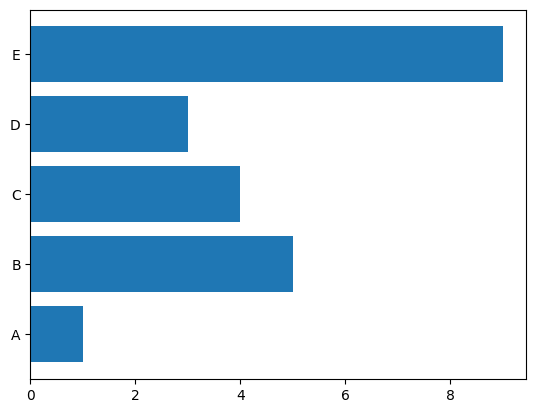

In [5]:
plt.barh(y=df.Group, width=df.Value)

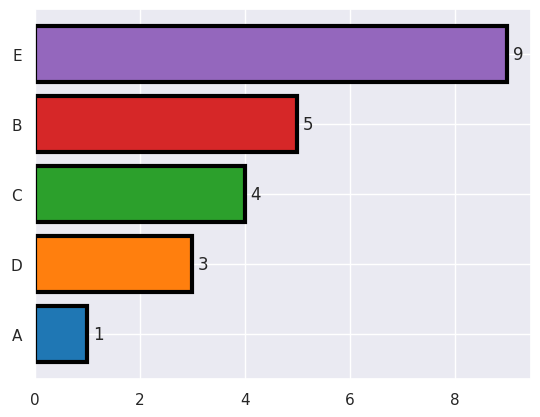

In [52]:
df = df.sort_values(by=['Value'])
my_plot = plt.barh(
    y=df.Group,
    width=df.Value,
    color=mcolors.TABLEAU_COLORS,
    edgecolor='black',
    linewidth=3
    )
plt.bar_label(container=my_plot, padding=4)
plt.show()

In [21]:
tips = sns.load_dataset('tips')

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Figure size 1800x800 with 0 Axes>

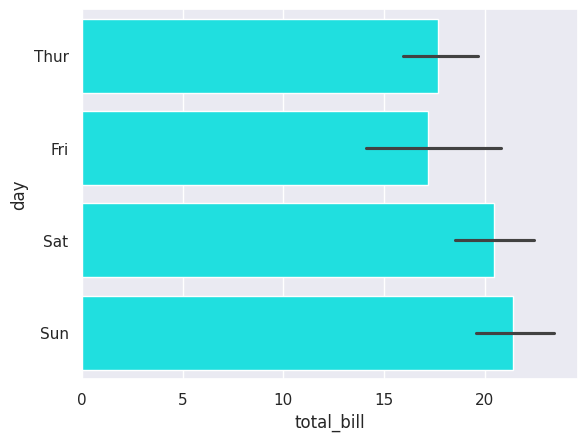

<Figure size 1800x800 with 0 Axes>

In [36]:
sns.set(style="darkgrid")
sns.barplot(
    x="total_bill",
    y="day",
    data=tips,
    color="cyan"
)
plt.figure(figsize=(18, 8))

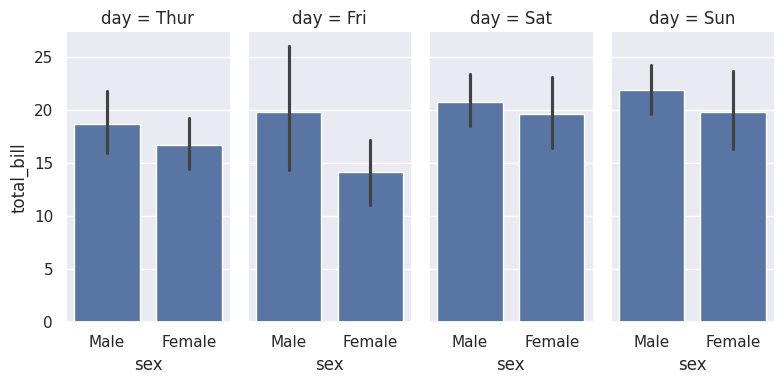

In [47]:
# Aslıhan's example
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
total = tips.groupby('day')['total_bill'].sum().reset_index()

/tmp/ipykernel_8575/2479030589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()


In [57]:
total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


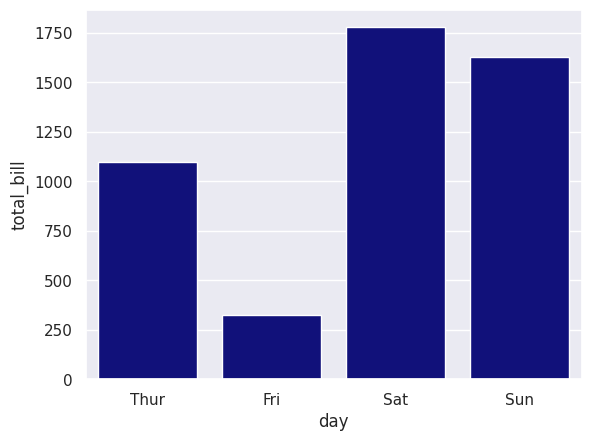

In [58]:
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

In [59]:
smoker = tips[tips.smoker=='Yes']

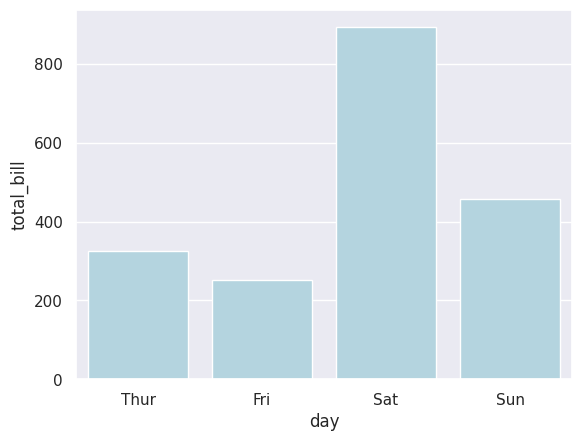

In [62]:
bar2 = sns.barplot(
    x='day',
    y='total_bill',
    data=smoker,
    estimator=sum,
    errorbar=None,
    color='lightblue'
)

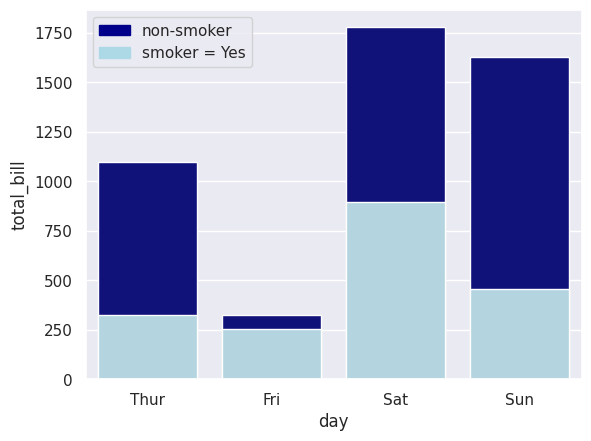

In [64]:
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')
bar2 = sns.barplot(
    x='day',
    y='total_bill',
    data=smoker,
    estimator=sum,
    errorbar=None,
    color='lightblue'
)
top_bar = mpatches.Patch(color='darkblue', label='non-smoker')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()